<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

In [2]:
#загрузим датасет и выведем первые 10 строк 
data_raw = pd.read_csv('/datasets/Churn.csv')
data_raw.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
#выведем информацию по столбцам
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#заменим пропуски в столбце Tenure на медианные значения
data_raw.loc[data_raw['Tenure'].isna(), 'Tenure'] = data_raw['Tenure'].median()

In [5]:
#выведем информацию по разбросу данных
data_raw.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#удалим столбцы с ненужной для анализа информацией
data = data_raw.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [7]:
#преобразуем категориальные столбцы 
data_ohe = pd.get_dummies(data, drop_first=True)

In [8]:
#разделим датасет на признаки и целевой признак, а также подготовим тренировочную, валидационную и тестовую выборки
features = data_ohe.drop('Exited', axis=1)
target = data_ohe['Exited']

features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.6, random_state=12345, stratify=target)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345, stratify=target_valid_test)

In [9]:
#приведем численные столбцы к одному масштабу
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


Проанализировав данные, были обнаружены пропуски в столбце Tenure, они были заменены на медианные значения. Также присутствовали столбцы 'RowNumber', 'Surname', 'CustomerId', которые не имеют ценности в построении модели, они были удалены. Категориальные признаки были преобразованы техникой OHE для эффективного обучения моделей. Все количественные признаки были приведены к одному масштабу. Данные были распределены на тренировочную, валидационную и тестовую выборки в соотношении 3:1:1 соответственно.

## Исследование задачи

In [10]:
#проверим целевой признак на наличие дисбаланса
data_ohe.value_counts('Exited')

Exited
0    7963
1    2037
dtype: int64

In [11]:
#обучим модель логистической регрессии без учета дисбаланса
model_lr = LogisticRegression(random_state=12345, solver='lbfgs') 
model_lr.fit(features_train, target_train)

predicted_valid = model_lr.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.3273164861612515


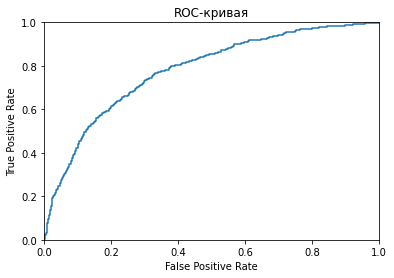

AUC-ROC: 0.7793549129637407


In [12]:
#построим ROC кривую и посчитаем значение AUC-ROC
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid))

Анализ показал наличие дисбаланса со смещением в сторону нулевых значений целевого признака (доля положительных 0,2). Обучив модель логистической регрессии без учета дисбаланса, мы достигли низкого значения F1 0,33. Значение AUC-ROC составило 0,78. 

## Борьба с дисбалансом

In [13]:
#избавимся от дисбаланса с помощью увеличения выборки с положительным целевым признаком
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts('Exited')

1    0.505818
0    0.494182
Name: Exited, dtype: float64

In [14]:
#обучим модель логистической регрессии с учетом дисбаланса
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_upsampled, target_upsampled)
predicted_valid_lr = model_lr.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_lr))

F1: 0.5090497737556562


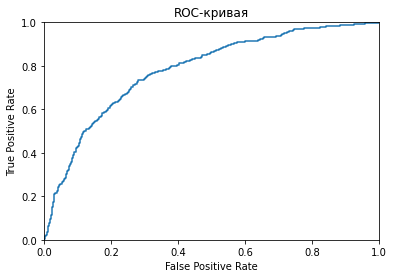

AUC-ROC: 0.781617054160538


In [15]:
#построим ROC кривую и посчитаем значение AUC-ROC
probabilities_valid_lr = model_lr.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_lr)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid_lr))

In [16]:
%%time
best_model_rf = None
best_result_rf = 0
for est in range(1, 60):
    for depth in range(1, 10):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rf.fit(features_upsampled, target_upsampled) 
        predicted_valid_rf = model_rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predicted_valid_rf)
        if f1_rf > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = f1_rf
print("Наилучшая модель:", best_model_rf)
print("F1 наилучшей модели на валидационной выборке:", best_result_rf)   

Наилучшая модель: RandomForestClassifier(max_depth=8, n_estimators=57, random_state=12345)
F1 наилучшей модели на валидационной выборке: 0.6208304969366917
CPU times: user 1min 10s, sys: 236 ms, total: 1min 10s
Wall time: 1min 10s


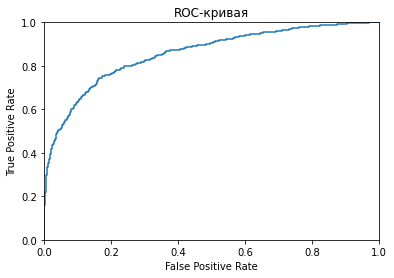

AUC-ROC: 0.8569137461044517


In [17]:
#построим ROC кривую и посчитаем значение AUC-ROC
probabilities_valid_rf = best_model_rf.predict_proba(features_valid)
probabilities_one_valid_rf = probabilities_valid_rf[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_rf)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid_rf))

Наилучшая модель: DecisionTreeClassifier(max_depth=7, random_state=12345)
F1 наилучшей модели на валидационной выборке: 0.547019053472649
CPU times: user 294 ms, sys: 3.9 ms, total: 297 ms
Wall time: 309 ms


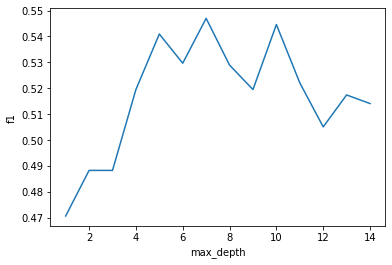

In [18]:
%%time
depths = []
scores = []
best_model_dt = None
best_result_dt = 0
for depth in range(1, 15):
    model_dt = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_dt.fit(features_upsampled, target_upsampled)
    predicted_valid_dt = model_dt.predict(features_valid)
    f1_dt = f1_score(target_valid, predicted_valid_dt)
    depths.append(depth)
    scores.append(f1_dt)
    if f1_dt > best_result_dt:
        best_model_dt = model_dt
        best_result_dt = f1_dt
plt.plot(depths, scores)
plt.xlabel('max_depth')
plt.ylabel('f1')
print("Наилучшая модель:", best_model_dt)
print("F1 наилучшей модели на валидационной выборке:", best_result_dt)

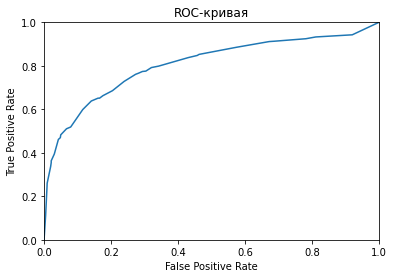

AUC-ROC: 0.8054257134616584


In [19]:
#построим ROC кривую и посчитаем значение AUC-ROC
probabilities_valid_dt = best_model_dt.predict_proba(features_valid)
probabilities_one_valid_dt = probabilities_valid_dt[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_dt)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid_dt))

Мы устранили дисбаланс с помощью мультипликации строк с положительным целевым признаком. Переобучив модель логистической регрессии с учетом дисбаланса, мы достигли почти в 2 раза более выского значения F1 0,51, при этом значение AUC-ROC осталось без изменений. Также мы обучили модели RF и DT, подобрав с помощью цикла оптимальные гиперпараметры. Наилучший результат показала модель RF с n_estimators=57, max_depth=8. Мы достигли значения F1 0.62, AUC-ROC 0,86. Хуже всех показала себя модель логистической регрессии. 

## Тестирование модели

In [20]:
#произведем тестирование модели на тестовой выборке
predicted_test_rf = best_model_rf.predict(features_test)
print("F1 наилучшей модели на тестовой выборке:", f1_score(target_test, predicted_test_rf))

F1 наилучшей модели на тестовой выборке: 0.6085164835164836


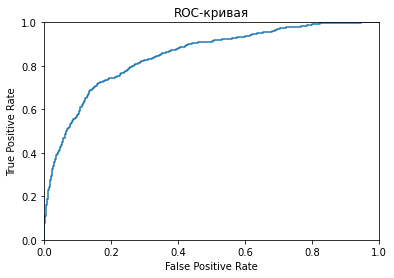

AUC-ROC: 0.8476528058566302


In [21]:
#построим ROC кривую и посчитаем значение AUC-ROC
probabilities_test_rf = best_model_rf.predict_proba(features_test)
probabilities_one_test_rf = probabilities_test_rf[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_rf)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_test, probabilities_one_test_rf))

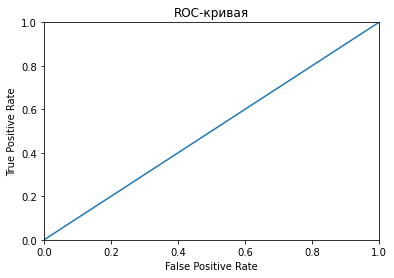

AUC-ROC: 0.5


In [22]:
#обучим случайную модель и построим ROC кривую и посчитаем значение AUC-ROC
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)
predicted_test_dummy = dummy_clf.predict(features_test)
probabilities_test_dummy = dummy_clf.predict_proba(features_test)
probabilities_one_test_dummy = probabilities_test_dummy[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_dummy)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_test, probabilities_one_test_dummy))   

Наилучшая модель была протестирована на тестовой выборке, мы достигли значения F1 0.61, AUC-ROC 0,85. Также была построена случайная модель со значением AUC-ROC 0,5. Все построеные модели прошли проверку на адекватность, значения AUC-ROC выше 0,5.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

Перед нами была поставлена задача спрогнозировать, уйдёт клиент из банка в ближайшее время или нет на основе предоставленных данных. Проанализировав данные, были обнаружены пропуски в столбце Tenure, они были заменены на медианные значения. Также присутствовали столбцы 'RowNumber', 'Surname', 'CustomerId', которые не имеют ценности в построении модели, они были удалены. Категориальные признаки были преобразованы техникой OHE для эффективного обучения моделей. Все количественные признаки были приведены к одному масштабу. Все количественные признаки были приведены к одному масштабу. Данные были распределены на тренировочную, валидационную и тестовую выборки в соотношении 3:1:1 соответственно. Анализ показал наличие дисбаланса со смещением в сторону нулевых значений целевого признака (доля положительных 0,2). Обучив модель логистической регрессии без учета дисбаланса, мы достигли низкого значения F1 0,33. Значение AUC-ROC составило 0,78. Мы устранили дисбаланс с помощью мультипликации строк с положительным целевым признаком. Переобучив модель логистической регрессии с учетом дисбаланса, мы достигли почти в 2 раза более выского значения F1 0,51, при этом значение AUC-ROC осталось без изменений. Также мы обучили модели RF и DT, подобрав с помощью цикла оптимальные гиперпараметры. Наилучший результат показала модель RF с n_estimators=57, max_depth=8. Мы достигли значения F1 0.62, AUC-ROC 0,86. Хуже всех показала себя модель логистической регрессии.Наилучшая модель была протестирована на тестовой выборке, мы достигли значения F1 0.61, AUC-ROC 0,85. Также была построена случайная модель со значением AUC-ROC 0,5. Все построеные модели прошли проверку на адекватность, значения AUC-ROC выше 0,5. Целевое значение F1 выше 0.59 достигнуто.